1\. **2D minimization of a six-hump camelback function**

$$f(x,y) = \left(4-2.1x^2+\frac{x^4}{3} \right) x^2 +xy + (4y^2 -4)y^2$$

has multiple global and local minima.

- Find the global minima of this function
- How many global minima are there, and what is the function value at those points?
- What happens for an initial guess of $(x, y) = (0, 0)$?

Hints:

* Variables can be restricted to $-2 < x < 2$ and $-1 < y < 1$.
* Use `numpy.meshgrid()` and `pylab.imshow()` to find visually the regions.
* Use `scipy.optimize.minimize()`, optionally trying its optional arguments.

In [3]:
#Packages
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
from scipy.optimize import basinhopping
from scipy.optimize import minimize

%matplotlib inline

In [4]:
#Define the function
def funct(x,y):
    return ((4-2.1*x**2+x**4/3)*x**2 + x*y + (4*y**2-4)*y**2)

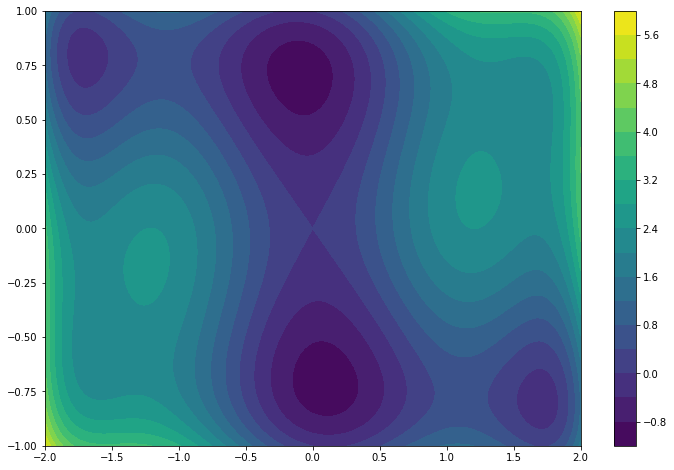

In [5]:
x = np.linspace(-2,2,500)
y = np.linspace(-1,1,500)

X, Y = np.meshgrid(x, y)
Z = funct(X, Y)


fig = plt.figure(figsize=(12,8))
cp = plt.contourf(X, Y, Z, 20)
plt.colorbar(cp)

In [6]:
#Define the function
def funct(x):
    f= ((4-2.1*x[0]**2+x[0]**4/3)*x[0]**2 + x[0]*x[1] + (4*x[1]**2-4)*x[1]**2)
    return f

In [7]:
x0 = [-2,2]
res = minimize(funct, x0)
print("Global minimum with initial condition (%.4f,%.4f): x = [%.4f, %.4f], f(x0) = %.4f" % (x0[0],x0[1],res.x[0],res.x[1],res.fun))

Global minimum with initial condition (-2.0000,2.0000): x = [-0.0898, 0.7127], f(x0) = -1.0316


In [8]:
x0 = [2,-2]
res = minimize(funct, x0)
print("Global minimum with initial condition (%.4f,%.4f): x = [%.4f, %.4f], f(x0) = %.4f" % (x0[0],x0[1],res.x[0],res.x[1],res.fun))

Global minimum with initial condition (2.0000,-2.0000): x = [0.0898, -0.7127], f(x0) = -1.0316


In [9]:
x0 = [0,0]
res = minimize(funct, x0)
print("Global minimum with initial condition (%.4f,%.4f) : x = [%.4f, %.4f], f(x0) = %.4f" % (x0[0],x0[1],res.x[0],res.x[1],res.fun))

Global minimum with initial condition (0.0000,0.0000) : x = [0.0000, 0.0000], f(x0) = 0.0000


Global minimum basinhopping with initial condition (0.0000,0.0000): x = [-0.0898, 0.7127], f(x0) = -1.0316


/tmp/ipykernel_167/2146527516.py:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "go" (-> color='g'). The keyword argument will take precedence.
  plt.plot(solution.x[0], solution.x[1], 'go', label="Minima", color = "r")


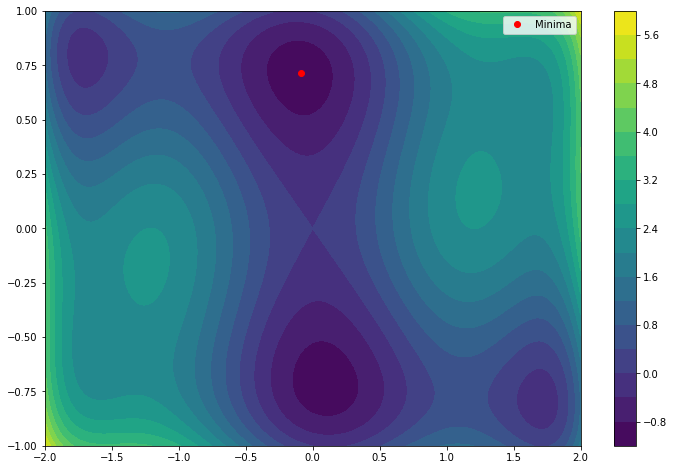

In [10]:
#Using basinhopping
x0 = [0,0]
solution = basinhopping(funct, x0, stepsize=1)
print("Global minimum basinhopping with initial condition (%.4f,%.4f): x = [%.4f, %.4f], f(x0) = %.4f" % (x0[0],x0[1],solution.x[0],solution.x[1],solution.fun))
#print(solution)

fig = plt.figure(figsize=(12,8))
cp = plt.contourf(X, Y, Z, 20)
plt.plot(solution.x[0], solution.x[1], 'go', label="Minima", color = "r")
plt.colorbar(cp)
plt.legend(loc = "best")

In [11]:
#Find local and global minima
import pandas as pd

x1 = []
y1 = []
f1 = []
accepted1 = []

def print_fun(x, f, accepted):
    #df = df.append({'(x,y)': x, 'MinValue': f, 'Accepted': int(accepted)}, ignore_index=True)
    x1.append(round(x[0], 4))
    y1.append(round(x[1], 4))
    f1.append(round(f, 4))
    accepted1.append(accepted)
    #print("% at minimum %.4f accepted %d" % (x, f, int(accepted)))
    
x0 = [0,0]
solution = basinhopping(funct, x0, stepsize=10,callback=print_fun)
print("Global minimum basinhopping with initial condition (%.4f,%.4f): x = [%.4f, %.4f], f(x0) = %.4f" % (x0[0],x0[1],solution.x[0],solution.x[1],solution.fun))
#print(solution)


Global minimum basinhopping with initial condition (0.0000,0.0000): x = [0.0898, -0.7127], f(x0) = -1.0316


- What happens for an initial guess of $(x, y) = (0, 0)$?  
For an initial guess of   $(x, y) = (0, 0)$ , due to the fact that  $(x, y) = (0, 0)$ is a saddle point, minimize fails in the search for minima. On the other hand basinhopping method finds them.

In [12]:
df = pd.DataFrame(columns=['x', 'y', 'MinValue', 'Accepted'])
print(len(x1))
for i in range(len(x1)):
    df = df.append({'x': x1[i],'y': y1[i], 'MinValue': f1[i], 'Accepted': int(accepted1[i])}, ignore_index=True)
df = df[df.Accepted != 0]
df = df.sort_values(by=['x'])
df = df[df.duplicated(keep='last') == False]
df = df[df.MinValue < 0.]
df

100


,x,y,MinValue,Accepted
57,-1.7036,0.7961,-0.2155,1.0
66,-0.0898,0.7127,-1.0316,1.0
22,0.0898,-0.7127,-1.0316,1.0
98,1.7036,-0.7961,-0.2155,1.0


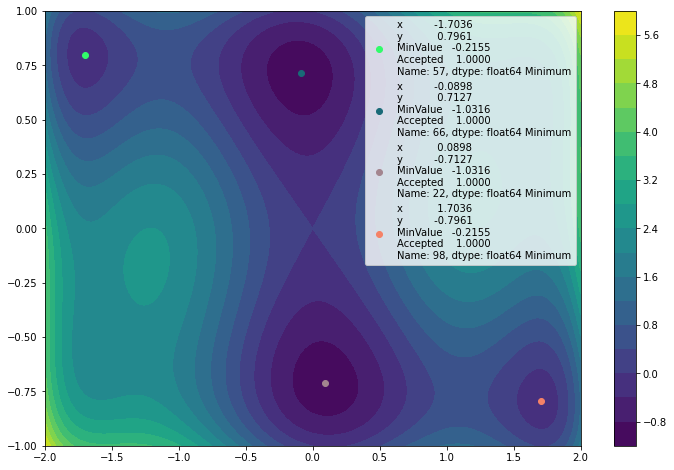

In [13]:
fig = plt.figure(figsize=(12,8))
cp = plt.contourf(X, Y, Z, 20)
for index, row in df.iterrows():
    rgb = np.random.rand(3,)
    plt.scatter(row["x"], row["y"], label='%s Minimum' % row, color = [rgb])
plt.colorbar(cp)
plt.legend(loc = "best")

Text(0.5, 1.0, 'Regions')

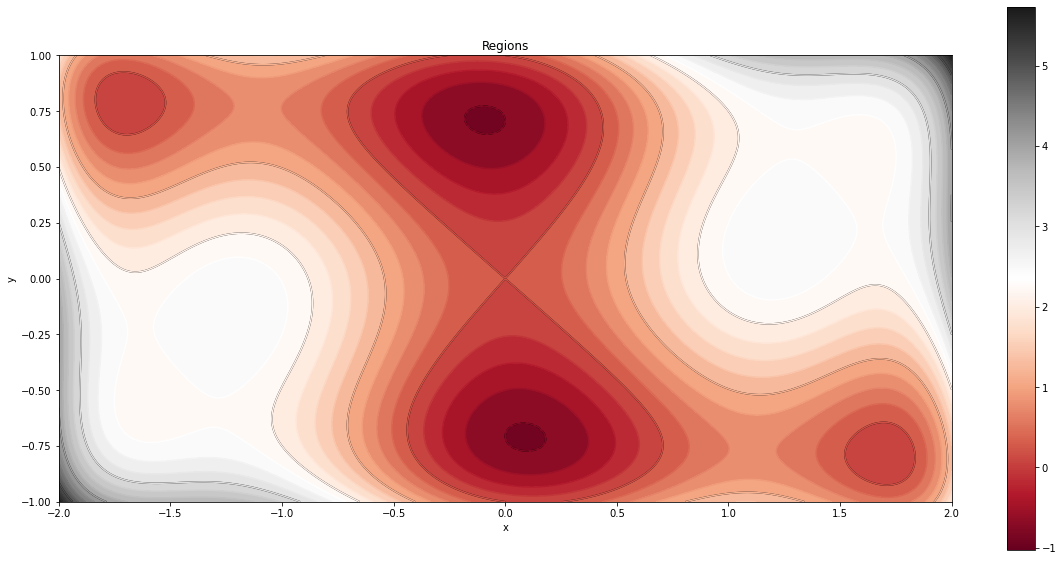

In [14]:
#Using imshow
#Define the function
def funct(x,y):
    return ((4-2.1*x**2+x**4/3)*x**2 + x*y + (4*y**2-4)*y**2)

x = np.linspace(-2,2,500)
y = np.linspace(-1,1,500)

X, Y = np.meshgrid(x, y)
Z = funct(X, Y)

plt.figure(figsize=(20,10))
plt.contour(X, Y, Z, colors='black');
plt.contour(X, Y, Z, 30, cmap='RdGy');

plt.contourf(X, Y, Z, 30, cmap='RdGy')
#plt.colorbar();
plt.imshow(Z, extent=[-2, 2, -1, 1], origin='lower',cmap='RdGy')

plt.colorbar()
#plt.axis(aspect='image');
plt.xlabel('x')
plt.ylabel('y')

# Add a title
plt.title('Regions')

2\. **Curve fitting of temperature in Alaska** 

The temperature extremes in Alaska for each month, starting in January, are given by (in degrees Celcius):

max:  `17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18`

min: `-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58`

* Plot these temperatures.
* Find a suitable a function that can describe min and max temperatures. 
* Fit this function to the data with `scipy.optimize.curve_fit()`.
* Plot the result. Is the fit reasonable? If not, why?
* Is the time offset for min and max temperatures the same within the fit accuracy?

Text(0.5, 1.0, 'Temperature in Alaska')

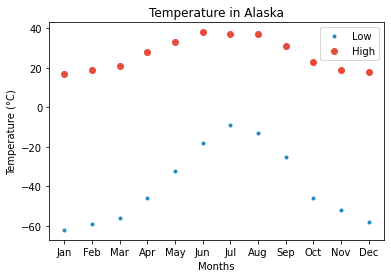

In [17]:
mx = np.array([17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18])
mn = np.array([-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58])
month = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
num_month = np.array([x for x in range(1,13,1)])
plt.plot(month,mn, '.',color='#1e8bc3', label = 'Low')
plt.plot(month,mx, 'o',color='#e74c3c', label = 'High')
plt.legend(loc = 'best')
plt.xlabel('Months')
plt.ylabel('Temperature (°C)')
plt.title('Temperature in Alaska')

In [18]:
from scipy import optimize, exp
import scipy.stats as stats
from scipy.stats import norm

#periodic function
def per_fun(t, mean, amp, offset):
    return (mean+amp*np.cos((t+offset)*2*np.pi/t.max()))

#gauss function
def gauss_fun(x,a,mu,sigma,offset):
    return (offset + a*stats.norm.pdf(x,mu,sigma))

par_gauss = np.array(['a','mu','sigma','offset'])
par_per = np.array(['mean','amp','offset'])

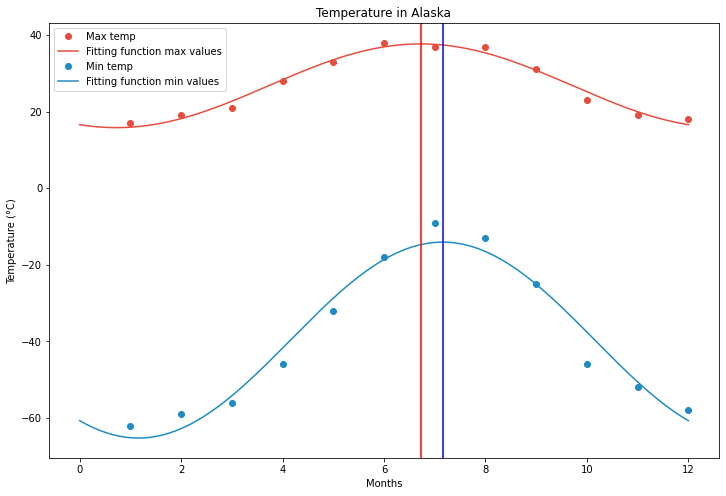

MIN VALUES
Parameters:
 [-39.66666667 -25.58169521  46.84396351]
Covariance matrix:
 [[ 1.63081379e+00  1.86091608e-08 -2.89785834e-10]
 [ 1.86091608e-08  3.26162758e+00 -4.51547724e-08]
 [-2.89785834e-10 -4.51547724e-08  1.81793561e-02]]
a  = -39.67 +- 1.28
mu  = -25.58 +- 1.81
sigma  = 46.84 +- 0.13

MAX VALUES
Parameters:
 [26.75       10.93254953 17.27651995]
Covariance matrix:
 [[ 1.58575615e-01  2.88186602e-10 -2.78271588e-11]
 [ 2.88186602e-10  3.17151233e-01  3.86404148e-09]
 [-2.78271588e-11  3.86404148e-09  9.67890653e-03]]
a  = 26.75 +- 0.40
mu  = 10.93 +- 0.56
sigma  = 17.28 +- 0.10


In [19]:
res_max, cov_max = optimize.curve_fit(per_fun, num_month, mx)
res_min, cov_min = optimize.curve_fit(per_fun, num_month, mn)

year_days = np.linspace(0, 12, 365)

plt.figure(figsize=(12,8))
plt.plot(num_month, mx, 'o',label='Max temp',color='#e74c3c')
plt.plot(year_days, per_fun(year_days, *res_max), color='#e74c3c',label='Fitting function max values')
plt.plot(num_month, mn, 'o',label='Min temp',color='#1e8bc3' )
plt.plot(year_days, per_fun(year_days, *res_min), color='#1e8bc3',label='Fitting function min values')

plt.axvline(year_days[np.argmax(per_fun(year_days, *res_max))],color="r")
plt.axvline(year_days[np.argmax(per_fun(year_days, *res_min))],color="b")

plt.legend(loc = 'best')
plt.xlabel('Months')
plt.ylabel('Temperature (°C)')
plt.title('Temperature in Alaska')

plt.show()

print("MIN VALUES")
print("Parameters:\n", res_min)
print("Covariance matrix:\n", cov_min)
for i in range(len(res_min)):
    print(par_gauss[i]," = %.2f +- %.2f" % (res_min[i], np.sqrt(cov_min[i,i])))

print("\nMAX VALUES")
print("Parameters:\n", res_max)
print("Covariance matrix:\n", cov_max)
for i in range(len(res_max)):
    print(par_gauss[i]," = %.2f +- %.2f" % (res_max[i], np.sqrt(cov_max[i,i])))

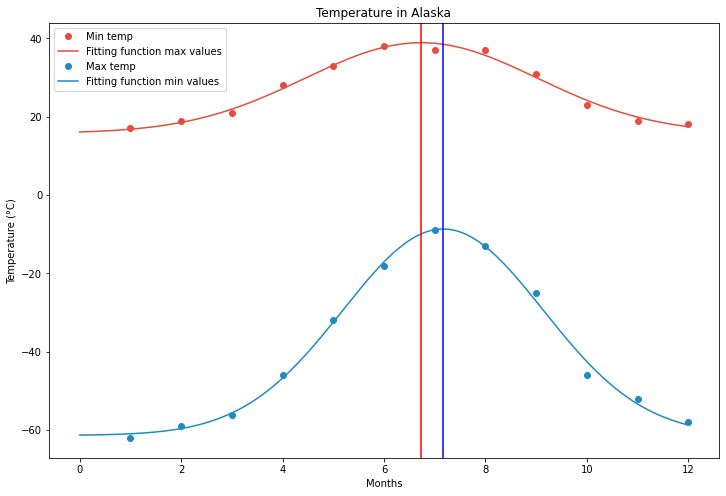

MIN VALUES
Parameters:
 [260.76392059   7.16452592   1.9759003  -61.32093835]
Covariance matrix:
 [[ 1.78561669e+02 -1.08268049e-02  8.74438840e-01 -1.45311343e+01]
 [-1.08268049e-02  2.22850204e-03 -4.92559706e-05  1.09103010e-03]
 [ 8.74438840e-01 -4.92559706e-05  5.77329761e-03 -7.06523965e-02]
 [-1.45311343e+01  1.09103010e-03 -7.06523965e-02  1.41331494e+00]]
a  = 260.76 +- 13.36
mu  = 7.16 +- 0.05
sigma  = 1.98 +- 0.08
offset  = -61.32 +- 1.19

MAX VALUES
Parameters:
 [132.80951067   6.73581644   2.29443639  15.77931557]
Covariance matrix:
 [[ 2.03783614e+02 -2.15075921e-02  2.17781905e+00 -1.61239366e+01]
 [-2.15075921e-02  6.31511232e-03 -2.12200121e-04  1.91617655e-03]
 [ 2.17781905e+00 -2.12200121e-04  2.75425314e-02 -1.70922566e-01]
 [-1.61239366e+01  1.91617655e-03 -1.70922566e-01  1.38423175e+00]]
a  = 132.81 +- 14.28
mu  = 6.74 +- 0.08
sigma  = 2.29 +- 0.17
offset  = 15.78 +- 1.18


In [40]:
res_max1, cov_max1 = optimize.curve_fit(gauss_fun, num_month, mx)
res_min1, cov_min1 = optimize.curve_fit(gauss_fun, num_month, mn, p0 = [7,1,1,-60])

days = np.linspace(1, 12,365)

plt.figure(figsize=(12,8))
plt.plot(num_month, mx, 'o',label='Min temp',color='#e74c3c')
plt.plot(year_days, gauss_fun(year_days, *res_max1), color='#e74c3c',label='Fitting function max values')

plt.plot(num_month, mn, 'o',label='Max temp',color='#1e8bc3')
plt.plot(year_days, gauss_fun(year_days, *res_min1), color='#1e8bc3' ,label='Fitting function min values')

plt.axvline(year_days[np.argmax(gauss_fun(year_days, *res_max1))],color="r")
plt.axvline(year_days[np.argmax(gauss_fun(year_days, *res_min1))],color="b")

plt.legend(loc = 'best')
plt.xlabel('Months')
plt.ylabel('Temperature (°C)')
plt.title('Temperature in Alaska')

plt.show()

print("MIN VALUES")
print("Parameters:\n", res_min1)
print("Covariance matrix:\n", cov_min1)
for i in range(len(res_min1)):
    print(par_gauss[i]," = %.2f +- %.2f" % (res_min1[i], np.sqrt(cov_min1[i,i])))

print("\nMAX VALUES")
print("Parameters:\n", res_max1)
print("Covariance matrix:\n", cov_max1)
for i in range(len(res_max1)):
    print(par_gauss[i]," = %.2f +- %.2f" % (res_max1[i], np.sqrt(cov_max1[i,i])))

Plot the result. Is the fit reasonable? If not, why?

In [41]:
#Goodness of Fit

res = mx - per_fun(num_month, *res_max)
SSR = np.sum(res**2)
TSS = np.sum((mx-np.mean(mx))**2)
R2pmax = 1 - (SSR/TSS)

res = mn - per_fun(num_month, *res_min)
SSR = np.sum(res**2)
TSS = np.sum((mn-np.mean(mn))**2)
R2pmin = 1 - (SSR/TSS)

print('Goodness of periodic fit:')
print('\nTemp_max: %.3f Temp_min: %.3f' %(R2pmax, R2pmin))

res = mx - gauss_fun(num_month, *res_max1)
SSR = np.sum(res**2)
TSS = np.sum((mx-np.mean(mx))**2)
R2gmax = 1 - (SSR/TSS)

res = mn - gauss_fun(num_month, *res_min1)
SSR = np.sum(res**2)
TSS = np.sum((mn-np.mean(mn))**2)
R2gmin = 1 - (SSR/TSS)

print('\nGoodness of gaussian fit:')
print('\nTemp_max: %.3f Temp_min: %.3f' %(R2gmax, R2gmin))

Goodness of periodic fit:

Temp_max: 0.977 Temp_min: 0.957

Goodness of gaussian fit:

Temp_max: 0.986 Temp_min: 0.995


- Is the time offset for min and max temperatures the same within the fit accuracy?

In [86]:

a = year_days[np.argmax(gauss_fun(year_days, *res_max1))]
a_max = year_days[np.argmax(gauss_fun(year_days, res_max1[0] + np.sqrt(cov_max1[0,0]) , res_max1[1]+ np.sqrt(cov_max1[1,1]) , res_max1[2]+ np.sqrt(cov_max1[2,2]) , res_max1[3]+ np.sqrt(cov_max1[3,3])))]
a_min = year_days[np.argmax(gauss_fun(year_days, res_max1[0] - np.sqrt(cov_max1[0,0]) , res_max1[1]- np.sqrt(cov_max1[1,1]) , res_max1[2]- np.sqrt(cov_max1[2,2]) , res_max1[3]- np.sqrt(cov_max1[3,3]) ))]
erra = (a_max-a_min)/2

b = year_days[np.argmax(gauss_fun(year_days, *res_min1))]
b_max = year_days[np.argmax(gauss_fun(year_days, res_min1[0] + np.sqrt(cov_min1[0,0]) , res_min1[1]+ np.sqrt(cov_min1[1,1]) , res_min1[2]+ np.sqrt(cov_min1[2,2]) , res_min1[3]+ np.sqrt(cov_min1[3,3]) ))]
b_min = year_days[np.argmax(gauss_fun(year_days, res_min1[0] - np.sqrt(cov_min1[0,0]) , res_min1[1]- np.sqrt(cov_min1[1,1]) , res_min1[2]- np.sqrt(cov_min1[2,2]) , res_min1[3]- np.sqrt(cov_min1[3,3])  ))]
errb = (b_max-b_min)/2

print('\nTime offset using Gaussian for Temp_max: %.2f+-%.2f' %(a, erra))
print('\nTime offset using Gaussian for Temp_min: %.2f+-%.2f' %(b, errb))
gauss_acc = abs(a-b)/np.sqrt(erra**2+errb**2)
print("\nCompatibility: %.2f " %(gauss_acc))

c = year_days[np.argmax(per_fun(year_days, *res_max))]
c_max = year_days[np.argmax(per_fun(year_days, res_max[0] + np.sqrt(cov_max[0,0]) , res_max[1]+ np.sqrt(cov_max[1,1]) , res_max[2]+ np.sqrt(cov_max[2,2])  ))]
c_min = year_days[np.argmax(per_fun(year_days, res_max[0] - np.sqrt(cov_max[0,0]) , res_max[1]- np.sqrt(cov_max[1,1]) , res_max[2]- np.sqrt(cov_max[2,2])  ))]
errc = (c_max-c_min)/2
      
d = year_days[np.argmax(per_fun(year_days, *res_min))]
d_max = year_days[np.argmax(per_fun(year_days, res_min[0] + np.sqrt(cov_min[0,0]) , res_min[1]+ np.sqrt(cov_min[1,1]) , res_min[2]+ np.sqrt(cov_min[2,2]) ))]
d_min = year_days[np.argmax(per_fun(year_days, res_min[0] - np.sqrt(cov_min[0,0]) , res_min[1]- np.sqrt(cov_min[1,1]) , res_min[2]- np.sqrt(cov_min[2,2]) ))]
errd = (d_max-d_min)/2
      
print('\nTime offset using Periodic for Temp_max: %.2f+-%.2f' %(c, errc))
print('\nTime offset using Periodic for Temp_min: %.2f+-%.2f' %(d, errd))
per_acc = abs(c-d)/np.sqrt(errc**2+errd**2)
print("\nCompatibility: %.2f " %(per_acc))


Time offset using Gaussian for Temp_max: 6.73+-0.08

Time offset using Gaussian for Temp_min: 7.15+-0.05

Compatibility: 4.46 

Time offset using Periodic for Temp_max: 6.73+--0.16

Time offset using Periodic for Temp_min: 7.15+--0.07

Compatibility: 2.41 


3\. **Fit the residues**

Read the `data/residuals_261.pkl` file. If you haven't it already, download it from here:

```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```

The feature name "residual" contains the residuals (defined as $y_i - \hat{y}_i$) of a linear regression as a function of the independent variable "distances".

- Considering only the "residual" feature, create an histogram with the appropriate binning and display it.
- Set the appropriate Poisson uncertainty for each bin (thus, for each bin, $\sigma_i = \sqrt{n_i}$, where $n_i$ is the number of entries in each bin)
- By looking at the distribution of the residuals, define an appropriate function and fit it to the histogram of the residuals
- Perform a goodness-of-fit test. Is the p-value of the fit satisfactory?

In [90]:
unpickled_df = pd.read_pickle("./data/residuals_261.pkl")
res = unpickled_df.item(0)['residuals']
dis = unpickled_df.item(0)['distances']

In [91]:
df = pd.DataFrame({'residuals': res, 'distances': dis})


In [19]:
clean = df[np.abs(df['residuals']) < 2]
clean

,residuals,distances
0,1.100000,16.0
1,-1.950000,6.3
8,-0.042857,3.3
9,0.128571,5.3
10,0.085714,15.0
...,...,...
11126,-0.760000,14.4
11127,0.380000,7.5
11128,0.083333,1.7
11129,0.166667,19.1


In [20]:
df[['residuals']].min().min()

-160.8499999999989

In [21]:
df[['residuals']].max().max()

11.32000000000005

Poisson number of bins: 105


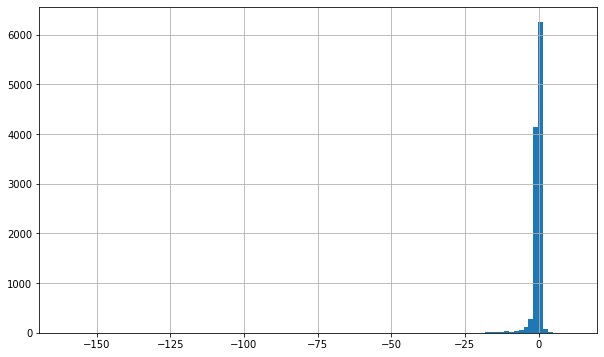

In [22]:
pbins = int(np.sqrt(len(df)))
print("Poisson number of bins:", pbins)

fig, ax0= plt.subplots(nrows=1, ncols=1, figsize = (10,6))
ax0 = df['residuals'].hist(bins=pbins)

Poisson number of bins: 102


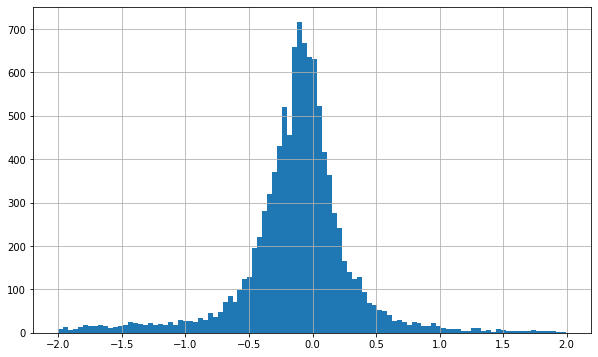

In [123]:
pbins = int(np.sqrt(len(clean)))
print("Poisson number of bins:", pbins)

fig, ax0= plt.subplots(nrows=1, ncols=1, figsize = (10,6))
ax0 = clean['residuals'].hist(bins=pbins)

Poisson number of bins: 102


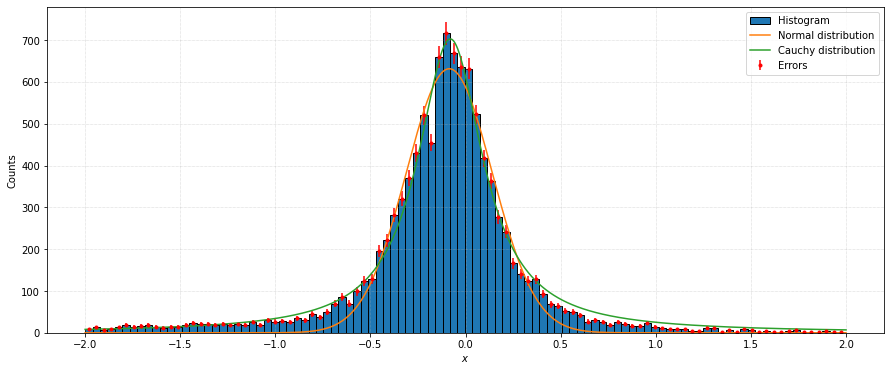

In [128]:
fig, ax0= plt.subplots(nrows=1, ncols=1 , figsize = (15,6))

clean = df[np.abs(df['residuals']) < 2]
N = len(clean['residuals'])
x = clean['residuals']

#Poisson
pbins = int(np.sqrt(N))
print("Poisson number of bins:", pbins)


histo = ax0.hist(x, pbins, ec = "black", label = 'Histogram') #If True, draw and return a probability density (density=True)
points = 0.5*(histo[1][1:] + histo[1][:-1]) #0.5 * width
errors = ax0.errorbar(points, histo[0], yerr = pow(histo[0],0.5), fmt = '.', color = 'r', label = 'Errors')
yerr = pow(histo[0],0.5)

ax0.grid(linestyle = ":",linewidth = 0.5)
ax0.set_xlabel('$x$')
ax0.set_ylabel('Counts')
ax0.legend(loc='best')

#Fit functions
def gauss_fun (x, a, mu, sig):
    return a*np.exp(-(x-mu)**2/(2*sig**2))

def cau_fun(x, a, x0, gamma):
    return a*gamma**2/((x-x0)**2+gamma**2)

gauss_ris, gauss_cov = optimize.curve_fit(gauss_fun, points, histo[0])
cau_ris, cau_cov = optimize.curve_fit(cau_fun, points, histo[0])

xpoints = np.linspace(-2,2,5000)
ax0.plot(xpoints, gauss_fun(xpoints, *gauss_ris), label='Normal distribution')
ax0.plot(xpoints, cau_fun(xpoints, *cau_ris), label='Cauchy distribution')



ax0.legend(loc='best')

n degrees of freedom = 101
chi2 = 8772.612810569548
p-value = 0.0


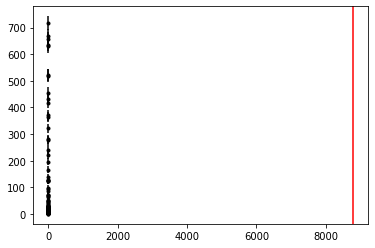

In [129]:
#GAUSS
# use plt.errorbar to plot points with the corresponding uncertainties 
plt.errorbar(points, histo[0], yerr, fmt='.k') 
x = points
y = histo[0]

ndof = len(x) - 1
print("n degrees of freedom =", ndof)
# calculate the chi^2
chi2 = np.sum(((y - gauss_fun(points, *gauss_ris))**2) / yerr)
print("chi2 =", chi2)
# calculate the p-value from the chi^2, the n.d.o.f., and the comulative chi^2 distribution
pvalue = 1. - stats.chi2.cdf(chi2, ndof)
print("p-value =", pvalue) # if the p-value is < 0.05, the fit is considered unsatisfactory

plt.plot(p, stats.chi2.cdf(p, df=ndof))
plt.fill_between(x, y, where=(x > chi2), color='lightblue')
plt.axvline(chi2, color='r')

n degrees of freedom = 101
chi2 = 3797.878977274918
p-value = 0.0


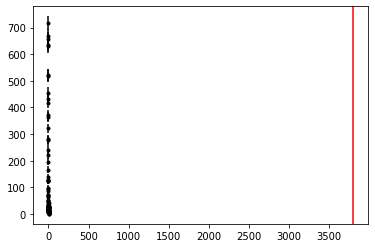

In [130]:
#CAUCHY
# use plt.errorbar to plot points with the corresponding uncertainties 
plt.errorbar(points, histo[0], yerr, fmt='.k') 
x = points
y = histo[0]

ndof = len(x) - 1
print("n degrees of freedom =", ndof)
# calculate the chi^2
chi2 = np.sum(((y - cau_fun(points, *cau_ris))**2) / yerr)
print("chi2 =", chi2)
# calculate the p-value from the chi^2, the n.d.o.f., and the comulative chi^2 distribution
pvalue = 1. - stats.chi2.cdf(chi2, ndof)
print("p-value =", pvalue) # if the p-value is < 0.05, the fit is considered unsatisfactory

plt.plot(p, stats.chi2.cdf(p, df=ndof))
plt.fill_between(x, y, where=(x > chi2), color='lightblue')
plt.axvline(chi2, color='r')

- Is the p-value of the fit satisfactory?  
The p-value is not satisfactory. Indeed, $\chi^2$ is very large. 

4\. **Temperatures in Munich**

Get the following data file:

```bash
https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt
```

which gives the temperature in Munich every day for several years.


Fit the following function to the data:

$$f(t) = a \cos(2\pi t + b)+c$$

where $t$ is the time in years.

- Make a plot of the data and the best-fit model in the range 2008 to 2012.

   - What are the best-fit values of the parameters?

   - What is the overall average temperature in Munich, and what are the typical daily average values predicted by the model for the coldest and hottest time of year?

   - What is the meaning of the $b$ parameter, and what physical sense does it have?


- Now fit the data with the function $g(x)$, which has 1 more parameter than $f(x)$.
$$g(x) = a \cos(2\pi b t + c)+d$$
   - What are the RSS for $f(x)$ and $g(x)$?
   - Use the Fisher F-test to determine whether the additional parameter is necessary.

In [27]:
date, temperature = np.loadtxt('./munich_temperatures_average_with_bad_data.txt', unpack=True)
keep = np.abs(temperature) < 90  
date = date[keep]
temperature = temperature[keep]
datek = (date >= 2008) & (date <= 2012)
date = date[datek]
temperature = temperature[datek]

In [28]:
def cosine(x, a, b, c):
    return a * np.cos(2 * np.pi * x + b) + c

In [29]:
popt, pcov = optimize.curve_fit(cosine, date, temperature)

Parameters:
 [-9.96203468 12.33174286  9.26282131]
Covariance matrix:
 [[ 1.75558202e-02  9.85997337e-07 -2.76510550e-06]
 [ 9.85997337e-07  1.77326375e-04  5.40543800e-08]
 [-2.76510550e-06  5.40543800e-08  8.78853325e-03]]
a  = -9.96 +- 0.13
b  = 12.33 +- 0.01
c  = 9.26 +- 0.09


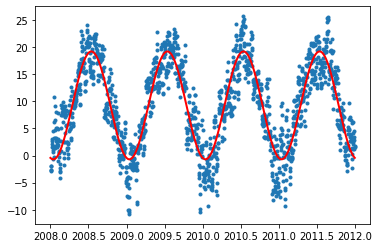

In [30]:
plt.plot(date, temperature, '.')
xfine = np.linspace(2008, 2012, 1000)
plt.plot(xfine, cosine(xfine, *popt), color='red', lw=2)

par_cos = np.array(['a','b','c'])

print("Parameters:\n", popt)
print("Covariance matrix:\n", pcov)
for i in range(len(popt)):
    print(par_cos[i]," = %.2f +- %.2f" % (popt[i], np.sqrt(pcov[i,i])))

In [31]:
#overall average temperature
average = np.mean(temperature)
print("Overall average temperature: %.2f °C" % average)

Overall average temperature: 9.26 °C


In [32]:
x = np.array(cosine(xfine, popt[0], popt[1], popt[2]))
#print(x)

# sorted array
sorted_index_array = np.argsort(x)
  
# sorted array
sorted_array = x[sorted_index_array] 
#print("Sorted array:", sorted_array)
n = 100

#n largest value
hot = sorted_array[-n : ]

cold = sorted_array[: n] 

#print("{} largest value:".format(n),hot)
#print("{} lowest value:".format(n),cold)

print("Daily average values predicted by the model for the coldest time of year: %.2f °C " %np.mean(cold))
print("Daily average values predicted by the model for the hottest time of year: %.2f °C " %np.mean(hot))

Daily average values predicted by the model for the coldest time of year: -0.54 °C 
Daily average values predicted by the model for the hottest time of year: 19.06 °C 


- What is the meaning of the  𝑏  parameter, and what physical sense does it have?  

$b$ is the parameter that takes into account the horizontal shift of the cosine function. The b in the formula represents phase shift.

In [34]:
def gcosine(x, a, b, c, d):
    return a * np.cos(2 * np.pi * b * x + c) + d

In [35]:
popt, pcov = optimize.curve_fit(gcosine, date, temperature)

Parameters:
 [-9.96073359  1.00029356  8.62426502  9.26567549]
Covariance matrix:
 [[ 1.77591257e-02 -2.63813089e-05  3.33180717e-01 -2.64225261e-04]
 [-2.63813088e-05  3.54898319e-06 -4.48214456e-02  3.44906582e-05]
 [ 3.33180716e-01 -4.48214456e-02  5.66067099e+02 -4.35595340e-01]
 [-2.64225261e-04  3.44906582e-05 -4.35595340e-01  9.12963623e-03]]
a  = -9.96 +- 0.13
b  = 1.00 +- 0.00
c  = 8.62 +- 23.79
d  = 9.27 +- 0.10


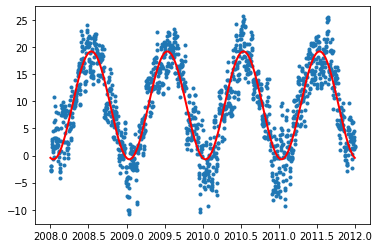

In [36]:
plt.plot(date, temperature, '.')
xfine = np.linspace(2008, 2012, 1000)
plt.plot(xfine, gcosine(xfine, *popt), color='red', lw=2)

par_gcos = np.array(['a','b','c', 'd'])

print("Parameters:\n", popt)
print("Covariance matrix:\n", pcov)
for i in range(len(popt)):
    print(par_gcos[i]," = %.2f +- %.2f" % (popt[i], np.sqrt(pcov[i,i])))

In [37]:
y_model = np.array(cosine(date, popt[0], popt[1], popt[2]))

# Compute the RSS value for f(t) parameterization of the model
rss = np.sum(np.square(temperature - y_model))
print("RSS f(t) = {:.2f}".format(rss))

y_gmodel = np.array(gcosine(date, popt[0], popt[1], popt[2], popt[3]))

# Compute the RSS value for g(t) parameterization of the model
grss = np.sum(np.square(temperature - y_gmodel))
print("RSS g(t) = {:.2f}".format(grss))

RSS f(t) = 116231.15
RSS g(t) = 18669.23


In [38]:
# define function for F-test
def Ftest(ssr_1, ssr_2, ndof_1, ndof_2, nbins, verbose=False):
    F = ((ssr_1 - ssr_2)/(ndof_2 - ndof_1)) / (ssr_2/(nbins - ndof_2))
    CL = 1. - stats.f.cdf(F, ndof_2 - ndof_1, nbins - ndof_2)
    if verbose: print("CL: %.3f" % CL, ", additional parameter necessary:", "YES" if CL < 0.10 else "NO")
    return CL

N = len(y_model)
x = date
y = temperature

SSR: 18669.515394578364 18669.22543060319
Test f(t) vs g(t):
CL: 0.880 , additional parameter necessary: NO


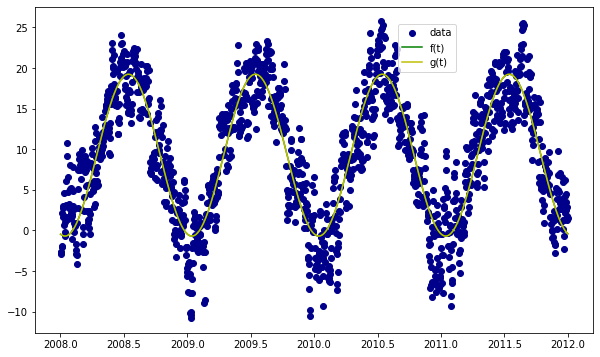

In [39]:
# plot
fig, ax = plt.subplots(figsize=(10, 6)) # create the figure and the axes
ax.scatter(x=x, y=y, marker='o', c='darkblue', label="data")

# define fitting functions
def cosine(x, a, b, c):
    return a * np.cos(2 * np.pi * x + b) + c

def gcosine(x, a, b, c, d):
    return a * np.cos(2 * np.pi * b * x + c) + d


(fa, fb, fc), cov = optimize.curve_fit(cosine, x, y)
y2 = cosine(x, fa, fb, fc)
ax.plot(x, y2, color='g', label="f(t)")
ssr_2 = np.sum((y2 - y)**2)
ndof_2 = 3 - 1 # n of parameters - 1

(fa, fb, fc, fd), cov = optimize.curve_fit(gcosine, x, y)
y3 = gcosine(x,fa, fb, fc, fd)
ax.plot(x, y3, color='y', label="g(t)")
ssr_3 = np.sum((y3 - y)**2)
ndof_3 = 4 - 1 # n of parameters - 1

ax.legend(loc=(0.65, 0.8))

print("SSR:",ssr_2, ssr_3)

# run F-test
# test f vs g

print("Test f(t) vs g(t):")
cl_2_vs_3 = Ftest(ssr_2, ssr_3, ndof_2, ndof_3, N, verbose=True)